#### Описание набора данных для исследования:

Источник - https://www.kaggle.com/datasets/devansodariya/student-performance-data

Объем набора данных составляет  395 записей. Имя файла с исходными данными student_data.csv.

#### Исходные данные содержат следующую информацию:

  
1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)
31. G1 - first period grade (numeric: from 0 to 20)
32. G2 - second period grade (numeric: from 0 to 20)

33. G3 - final grade (numeric: from 0 to 20, output target)

Постановка задачи: как окружающая среда влияет на успеваемость студентов. Можно ли по имеющимся показателям внешней среды предсказать как студент справиться с программой курса?

In [60]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn import preprocessing

import seaborn as sns

csv=pd.read_csv(r'student_data.csv')
csv.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Проверим качество и состав наших данных.

In [61]:
#csv.columns
csv.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [62]:
columns_int64=csv.select_dtypes(include=['int64']).columns.tolist()
columns_int64

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

In [63]:
columns_object = csv.select_dtypes(include=['object']).columns.tolist()
columns_object

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [64]:
csv_columns_object=csv.loc[:, columns_object]
for col in csv_columns_object:
  print(csv_columns_object[col].unique())

['GP' 'MS']
['F' 'M']
['U' 'R']
['GT3' 'LE3']
['A' 'T']
['at_home' 'health' 'other' 'services' 'teacher']
['teacher' 'other' 'services' 'health' 'at_home']
['course' 'other' 'home' 'reputation']
['mother' 'father' 'other']
['yes' 'no']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['yes' 'no']
['yes' 'no']
['no' 'yes']
['no' 'yes']


Предикторами выспупают все поля, кроме  'G3' - это отклик в наших данных - грейд в выпускном классе.

In [65]:
round(csv.describe(),1)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.0,395.0,395.0,395.0,395.0,395.0,395.0,395.0,395.0,395.0,395.0,395.0,395.0,395.0,395.0,395.0
mean,16.7,2.7,2.5,1.4,2.0,0.3,3.9,3.2,3.1,1.5,2.3,3.6,5.7,10.9,10.7,10.4
std,1.3,1.1,1.1,0.7,0.8,0.7,0.9,1.0,1.1,0.9,1.3,1.4,8.0,3.3,3.8,4.6
min,15.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0
25%,16.0,2.0,2.0,1.0,1.0,0.0,4.0,3.0,2.0,1.0,1.0,3.0,0.0,8.0,9.0,8.0
50%,17.0,3.0,2.0,1.0,2.0,0.0,4.0,3.0,3.0,1.0,2.0,4.0,4.0,11.0,11.0,11.0
75%,18.0,4.0,3.0,2.0,2.0,0.0,5.0,4.0,4.0,2.0,3.0,5.0,8.0,13.0,13.0,14.0
max,22.0,4.0,4.0,4.0,4.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,75.0,19.0,19.0,20.0


In [66]:
csv.isnull().sum().sum()

0

Пропущенных значений нет. Явно нестандартных значений не видно.
Более детально посмотрим на возможные аномалий с помощью графика boxplot.

<Axes: >

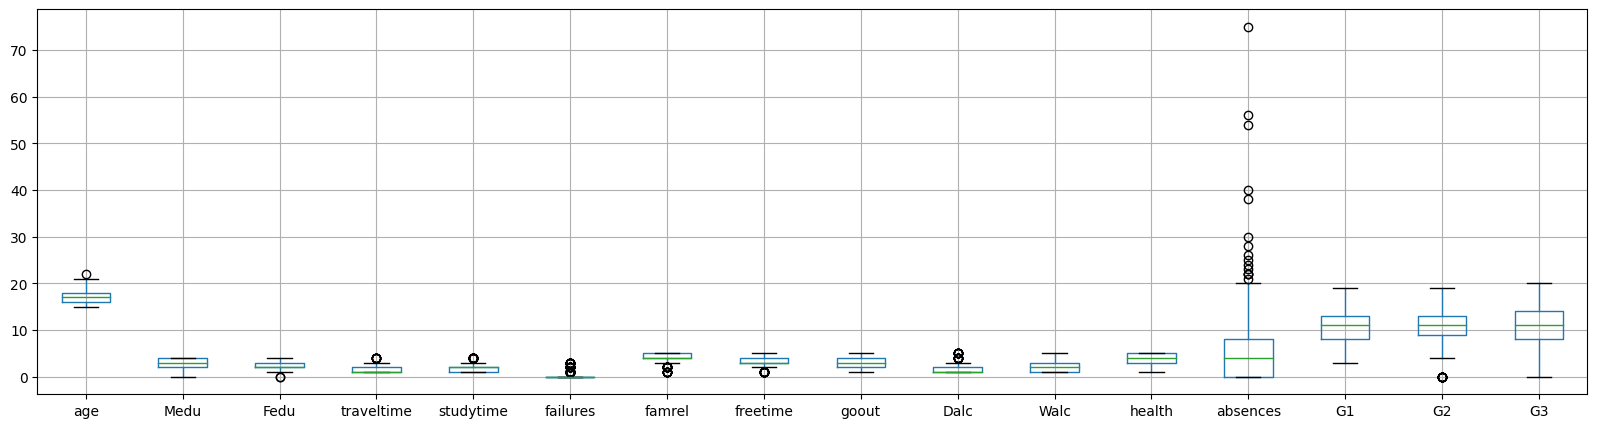

In [67]:
csv.boxplot(figsize=(20,5))

Большие выбросы имеет показатеь "absences" (количество прогулов), рассмотрим его отдельно.

In [68]:
csv_without_absences=csv.drop('absences', axis=1)
#csv_without_absences.boxplot(figsize=(20,5))

Данные имеют разные единицы измерения, поэтому для наглядности и сравнения стандартизуем их.

Применим к данным линейную нормировку (MinMaxScaler) и построим по ним график boxplot.

<Axes: >

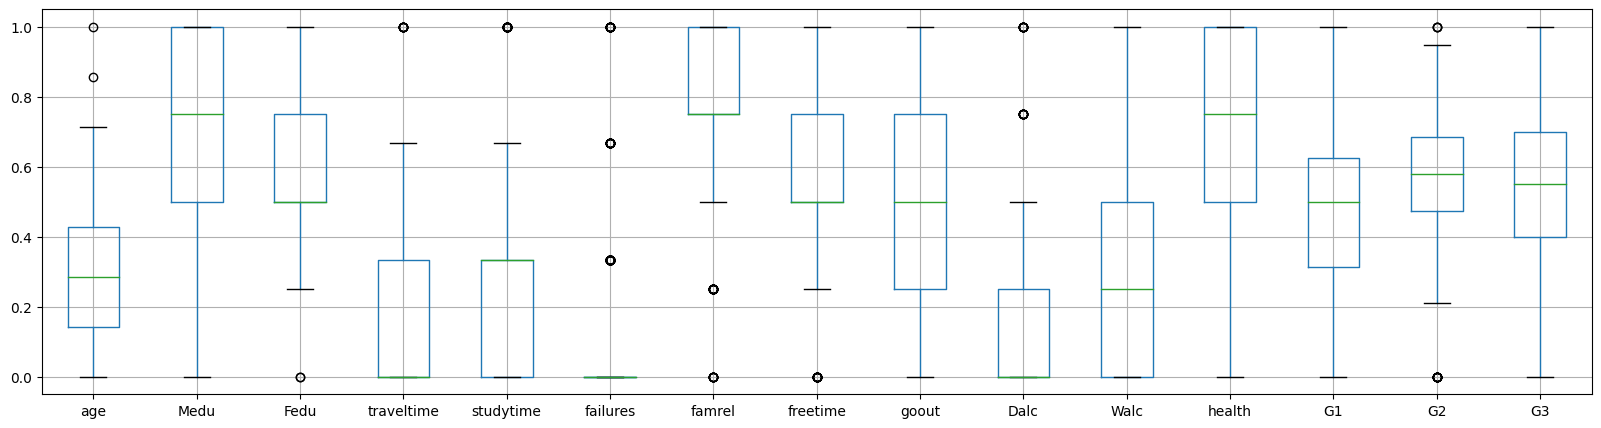

In [69]:
columns_int64_whithout_absences=columns_int64.copy()
columns_int64_whithout_absences.remove('absences')

csv_x=csv[columns_int64_whithout_absences]
stand = preprocessing.MinMaxScaler(copy=False)
csv_x_norm = stand.fit_transform(csv_x)
pd.DataFrame(csv_x_norm, index = csv_x.index,columns = csv_x.columns).boxplot(figsize=(20,5))

Хотя на графике видны выбросы практически у всех показателей, однако их экстремальные значения из функции describe() вполне допустимы как по смыслу, так и в границах заданных интервалов. Поэтому эти исходные данные будем считать "чистыми".

<Axes: >

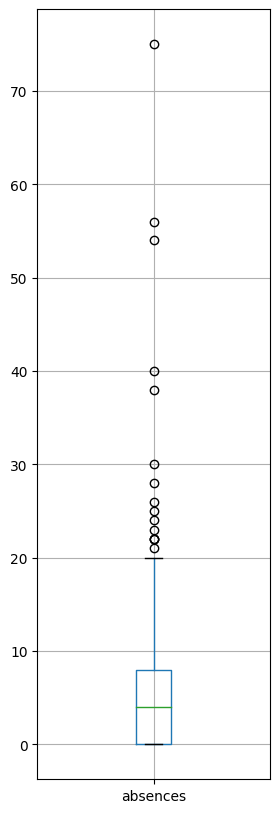

In [70]:
#Теперь рассмотри признак absences

pd.DataFrame(csv['absences']).boxplot(figsize=(3,10))

In [71]:
print('Количество студентов, пропустивших более 20 дней:',  csv[csv['absences']>20].shape[0])
print('Количество студентов, пропустивших более 30 дней:',  csv[csv['absences']>30].shape[0])

Количество студентов, пропустивших более 20 дней: 15
Количество студентов, пропустивших более 30 дней: 5


Мы не будем брать в расчетную модель студентов, которые пропустили очень много занятий по причинам, не связанным с болезнью (health).

In [72]:
csv_extra=csv[(csv['absences']>20) & ( csv['health'].isin([4,5]))]
print(csv_extra.index)
#csv_extra


Int64Index([74, 205, 276, 280, 307, 320], dtype='int64')


In [73]:
csv_clear = csv.copy()
csv_clear=csv_clear.drop(index=csv_extra.index)# очищаем данные от "аномальных" прогульщиков
csv_clear.shape

(389, 33)

<Axes: >

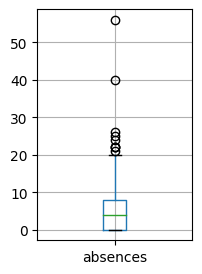

In [74]:
pd.DataFrame(csv_clear['absences']).boxplot(figsize=(2,3))

In [75]:
csv_clear[(csv_clear['absences']>20)]# остались прогулы, связанные с болезью

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
40,GP,F,16,U,LE3,T,2,2,other,other,...,3,3,3,1,2,3,25,7,10,11
103,GP,F,15,U,GT3,T,3,2,services,other,...,4,3,5,1,1,2,26,7,6,6
183,GP,F,17,U,LE3,T,3,3,other,other,...,5,3,3,2,3,1,56,9,9,8
198,GP,F,17,U,GT3,T,4,4,services,teacher,...,4,2,4,2,3,2,24,18,18,18
216,GP,F,17,U,GT3,T,4,3,other,other,...,3,4,5,2,4,1,22,6,6,4
260,GP,F,18,U,GT3,T,4,3,services,other,...,3,1,2,1,3,2,21,17,18,18
277,GP,M,18,U,GT3,T,4,4,teacher,services,...,3,2,4,1,4,3,22,9,9,9
313,GP,F,19,U,LE3,T,3,2,services,other,...,4,2,2,1,2,1,22,13,10,11
315,GP,F,19,R,GT3,T,2,3,other,other,...,4,1,2,1,1,3,40,13,11,11


Проанализируем колонку отклика G3

In [76]:
value_counts = csv['G3'].value_counts()
df_value_counts = pd.DataFrame(value_counts)
df_value_counts = df_value_counts.reset_index()
df_value_counts.columns = ['G3', 'counts_for_G3']
df_value_counts.sort_values (by = ['G3'])

,G3,counts_for_G3
2,0,38
17,4,1
13,5,7
10,6,15
12,7,9
4,8,32
7,9,28
0,10,56
1,11,47
6,12,31


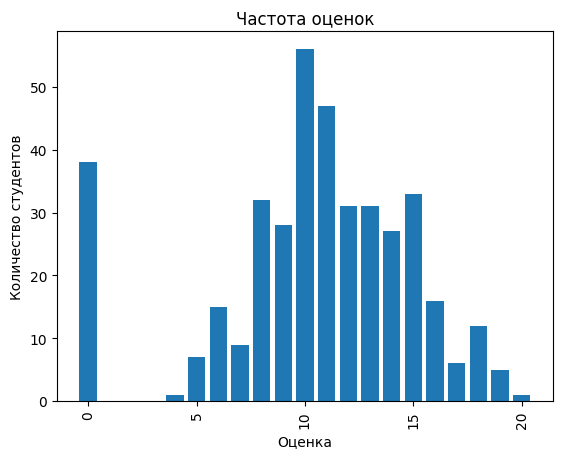

In [77]:
xplot=df_value_counts['G3']
yplot=df_value_counts['counts_for_G3']
plt.bar(xplot,yplot)
plt.title('Частота оценок')
plt.xticks(rotation='vertical')
plt.xlabel('Оценка')
plt.ylabel('Количество студентов')
plt.show()

Посмотрим на числовые характеристики студентов, у которых итоговый балл равен 0 и не равен 0 (средние значения).

In [78]:
csv_clear.loc[csv_clear['G3'] == 0].describe().loc['mean']

age           17.078947
Medu           2.315789
Fedu           2.289474
traveltime     1.605263
studytime      1.973684
failures       0.921053
famrel         3.842105
freetime       3.131579
goout          3.210526
Dalc           1.342105
Walc           1.921053
health         3.605263
absences       0.000000
G1             7.526316
G2             4.657895
G3             0.000000
Name: mean, dtype: float64

In [79]:
csv_clear.loc[csv_clear['G3'] != 0].describe().loc['mean']

age           16.643875
Medu           2.783476
Fedu           2.541311
traveltime     1.430199
studytime      2.045584
failures       0.270655
famrel         3.951567
freetime       3.250712
goout          3.102564
Dalc           1.492877
Walc           2.324786
health         3.527066
absences       5.717949
G1            11.290598
G2            11.381766
G3            11.555556
Name: mean, dtype: float64

По описанию видим, что эти студнеты не пропускали занятия, не пьют.
Cредние показатели, кроме G1 и G2, абсолюно сопоставимы с основной массой студентов.

Единственным повышенным показателем (в 3,3 раза) является failures (жизненные потрясения) 0.921053/0.270655. Возможно студенты взяли академ и не получили еще итоговую оценку.

Поэтому мы удалим строки, в которых отклик G3 равен нулую.

In [80]:
csv_G3_0=csv_extra=csv_clear[(csv_clear['G3']==0)]
csv_clear=csv_clear.drop(index=csv_G3_0.index)
#csv_clear

Количество категориальных признаков сопоставимо с количеством числовых признаков, поэтому мы сразу включаем их в модель через one-hot кодировние.

In [81]:
X = csv_clear.drop('G3', axis=1)
Y=csv_clear['G3']
X_OH=pd.get_dummies(X, drop_first=True)

Построим матрицу корреляций признаков.

In [82]:
#Нижеследующее изображение будет не инфомративно, т.к. идет большое наслоение 41 признака
#sns.heatmap(X_OH.corr(), cmap="YlGnBu", annot=True)
# Поэтому вычислим коррелированные признаки вручную.
corr = X_OH.corr()
#corr.shape #(41, 41)

#Отобразим матрицу корреляции только для самых коррелированных признаков, задав порог в 0.5
potential_corr=[]
for col in corr.columns:
    tmp=corr.index[(abs(corr[col])>0.5) & (corr[col]!=1)]. tolist ()
    if len(tmp)>0:
        #print(tmp)
        potential_corr.append(tmp[0])

print (potential_corr)

['Fedu', 'Medu', 'Walc', 'Dalc', 'G2', 'G1', 'Fjob_services', 'Fjob_other']


<Axes: >

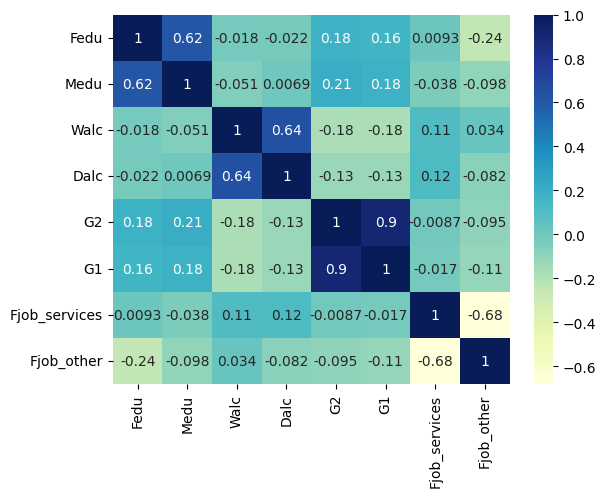

In [83]:
sns.heatmap(X_OH[potential_corr].corr(), cmap="YlGnBu", annot=True)

У нас заметна корреляция признака G1 (first period grade) и G2 (second period grade). Будем от нее избавляться.

In [84]:
random_state=9

from sklearn.model_selection import train_test_split

Для равномерного распределения данных на тестовые и тренировочные применим стратификацию к отклику G3.

При стратификации по истинному значению G3 возникла ошибка - ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2. Т.е. в данных есть  группы с одним значением,они мешают стратификации. Перенесем их в соседние ненулевые группы.

In [85]:
X_OH['STRATA']=csv_clear['G3']
X_OH.loc[X_OH['STRATA'] == 4, 'STRATA'] = 5
X_OH.loc[X_OH['STRATA'] == 20, 'STRATA'] = 19

Разделим даныне на тренировочные и тестовые выборки.

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X_OH, Y, test_size=0.2, random_state=random_state, stratify=X_OH['STRATA'])

print(y_train.mean(), y_test.mean()) #баллы сбалансированы

X_train=X_train.drop('STRATA', axis=1)
X_test=X_test.drop('STRATA', axis=1)

11.55 11.577464788732394


Произведем номировку данных.

In [87]:
stand = preprocessing.MinMaxScaler(copy=False)
X_train_norm=pd.DataFrame(stand.fit_transform(X_train))
X_test_norm=pd.DataFrame(stand.fit_transform(X_test))

X_train_norm.columns=X_train.columns
X_test_norm.columns=X_test.columns

print(X_train_norm.shape)
print(X_test_norm.shape)

(280, 41)
(71, 41)


Уберем коррелированные признаки в нормированных данных.




In [88]:
from sklearn.decomposition import PCA

In [89]:
G12train_norm = X_train_norm[['G1', 'G2']]
# Обучите модель PCA для двух наиболее коррелированных признаков.
pca = PCA(n_components=2, svd_solver = 'full').fit(G12train_norm)
X_train_norm_G12 = X_train_norm.drop(['G1', 'G2'], axis = 1)
X_train_norm_G12['G12'] = pca.transform(G12train_norm)[:,0]

G12test_norm = X_test_norm[['G1', 'G2']]
X_test_norm_G12 = X_test_norm.drop(['G1', 'G2'], axis = 1)
X_test_norm_G12['G12'] = pca.transform(G12test_norm)[:,0]

print(X_train_norm_G12.shape)
print(X_test_norm_G12.shape)

(280, 40)
(71, 40)




---



Так как у наших объектов  32 признака (а по итогу one-hot кодирования 41 признак), то нам сложно выявить какие-то общности внутри них.

Для общего представления о наших объектах попробуем использовать метод построения главных компонет (ГК) для уменьшения размерности.

Количество ГК сначала возьмем максимальным, равным количеству признаков, т.е. 41.

In [90]:
pca = PCA(n_components = X_train_norm.shape[1], svd_solver = 'full') # Создание объекта класса PCA
pca.fit_transform(X_train_norm)

array([[-0.45168355, -0.02608945,  0.52683653, ..., -0.06247145,
        -0.03164123,  0.11278546],
       [-0.62146435, -0.97436827,  0.429726  , ..., -0.04067027,
        -0.03142285, -0.01333233],
       [ 0.07606032, -0.20478344, -1.50049765, ...,  0.03982245,
         0.03335214, -0.02385724],
       ...,
       [ 0.53340203, -0.23071249,  0.04813732, ..., -0.13773323,
         0.28242797,  0.01686503],
       [-0.71561845,  0.03353504,  0.66734642, ..., -0.04484986,
         0.06685967, -0.11158099],
       [ 0.27987408,  0.97796878,  1.03902469, ..., -0.14017287,
        -0.10495874, -0.09083666]])

Найдем долю объясненной дисперсии в зависимости от количества используемых ГК.

In [91]:
explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_),2)
explained_variance

array([0.09, 0.18, 0.24, 0.3 , 0.36, 0.41, 0.45, 0.5 , 0.54, 0.58, 0.61,
       0.65, 0.68, 0.71, 0.73, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86, 0.87,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.97, 0.98,
       0.98, 0.99, 0.99, 0.99, 1.  , 1.  , 1.  , 1.  ])

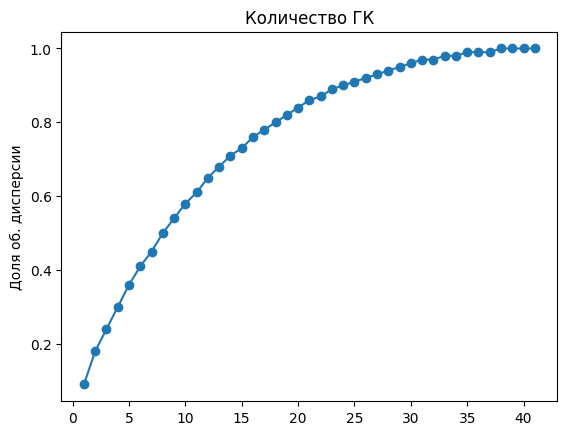

In [92]:
plt.plot(np.arange(1,42), explained_variance, marker='o')
plt.ylabel('Доля об. дисперсии')
plt.title('Количество ГК')
plt.show()

Доля объясненой дисперси в 0,95 позволяеn оставить из 41 признаков всего 29.

Для моделей регрессий мы оставим все признаки, соединив через PCA только два коррелированных признака G1 и G2 в один G12.

Замечание: использование 29 ГК на классификаторах показал accuracy в 2 раза хуже, чем без ГК, поэтому в данном проекте 29 ГК не использовались.

Отслеживать эффективность моделей мы будем по двум метрикам: для регрессий r2_score, для классификаторов accuracy.

In [93]:
pca = PCA(n_components = 29, svd_solver = 'full')
X_train_norm_pca = pca.fit_transform(X_train_norm)
X_test_norm_pca  = pca.transform(X_test_norm)
print(X_train_norm_pca.shape)
print(X_test_norm_pca.shape)

(280, 29)
(71, 29)


In [94]:
G12train = X_train[['G1', 'G2']]
pca = PCA(n_components=2, svd_solver = 'full').fit(G12train)
X_train_G12 = X_train.drop(['G1', 'G2'], axis = 1)
X_train_G12['G12'] = pca.transform(G12train)[:,0]
X_train_G12.shape

(280, 40)

In [95]:
G12test = X_test[['G1', 'G2']]
X_test_G12 = X_test.drop(['G1', 'G2'], axis = 1)
X_test_G12['G12'] = pca.transform(G12test)[:,0]
X_test_G12.shape

(71, 40)

В силу того, что нам известны отклик G3 (final grade) попробуем построить модели регрессий для предсаказания финальной оценки G3 при заданных условиях внешней среды студента.

In [96]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

regressors = [
    LinearRegression(),
    Ridge(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    ExtraTreesRegressor(),
    GradientBoostingRegressor(),
    KNeighborsRegressor()
]

for model in regressors:
    model.fit(X_train_norm_G12, y_train)
    y_pred = model.predict(X_test_norm_G12)
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print()

	Mean absolute error: 0.9047436348316394
	R2 score: 0.8741704773500909

	Mean absolute error: 0.888404578008156
	R2 score: 0.8809164374810751

	Mean absolute error: 1.1549295774647887
	R2 score: 0.7858959453567795

	Mean absolute error: 0.879718309859155
	R2 score: 0.881208105653248

	Mean absolute error: 0.8263380281690144
	R2 score: 0.8862445810928644

	Mean absolute error: 0.8209855851179446
	R2 score: 0.8974738106934173

	Mean absolute error: 2.3690140845070427
	R2 score: 0.21730780409824146



Наиболее сильныи моделями представляются ExtraTreesRegressor, GradientBoostingRegressor.

Построим модель простой линйной регресии, чтобы наглядно показать, как тот или иной признак влияет на итоговый показатель студента.

In [97]:
my_LinearRegression = LinearRegression().fit(X_train_norm_G12, y_train)
#print(my_LinearRegression.intercept_) #коэффициент Фи0
#print(my_LinearRegression.coef_) # коэффициенты Фи1-Фи40
print(my_LinearRegression)
print('')

d=pd.DataFrame(columns=['col1','col2'])
d['col1']=X_train_norm_G12.columns
d['col2']=my_LinearRegression.coef_
d.sort_values (by = ['col2'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, positive=False)



,col1,col2
12,absences,-2.101360
7,freetime,-0.399923
13,school_MS,-0.365474
17,Pstatus_T,-0.336141
8,goout,-0.315101
11,health,-0.279296
4,studytime,-0.251859
14,sex_M,-0.200005
28,reason_reputation,-0.187044
35,nursery_yes,-0.180279


In [98]:
my_colors=[]
for c in my_LinearRegression.coef_:
    if c > 0:
        my_colors.append('blue')
    else:
        my_colors.append('red')

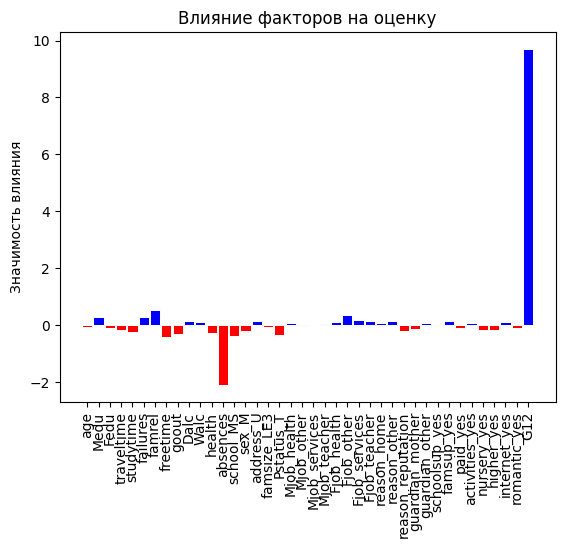

In [99]:
xplot=X_train_norm_G12.columns
yplot=my_LinearRegression.coef_
plt.bar(xplot,yplot, color=my_colors, width=0.9, edgecolor="white", linewidth=0.7)

plt.title('Влияние факторов на оценку')
plt.xticks(rotation='vertical')
plt.ylabel('Значимость влияния')
plt.show()

Логично, что существенное отрицательное влияние на оценки студентов оказывают пропуски занятий ("Absence") и наличие свободного времени ("freetime"). И совсем не логично, что отрицательно влияет на оценки статус родителй, если они не в разводе ("Pstatus"="Together")

Значимым положительным факторм является то, как студент учился в предыдущие годы ("G12"). Особо стоит отметить, что заметное положительное влияние на успеваемость студентов оказывают взаимоотношения в семье ("Famrel"), образование матери ("Medu") и работа отца ("Fjob"="other").

In [100]:
model_r2_score = {}  # сюда будем сохранять качество натренированных моделей регресии

In [101]:
model_r2_score['Linear train F'] = metrics.r2_score(y_train, my_LinearRegression.predict(X_train_norm_G12))
model_r2_score['Linear test F']  = metrics.r2_score(y_test,  my_LinearRegression.predict(X_test_norm_G12))

print('Linear train F', metrics.r2_score(y_train, my_LinearRegression.predict(X_train_norm_G12)))
print('Linear test F' , metrics.r2_score(y_test, my_LinearRegression.predict(X_test_norm_G12)))
print(' ')

import numpy as np
y_pred= np.round(my_LinearRegression.predict(X_test_norm_G12))
print('LinearRound test F' , metrics.r2_score(y_test, y_pred))

Linear train F 0.9251120127429102
Linear test F 0.8741704773500909
 
LinearRound test F 0.8723114372910914


Попробуем подобрать оптимальные параметры для нашей модели, использовав модуль GridSearchCV.

In [102]:
#Общие
from sklearn.model_selection import GridSearchCV
from sklearn import set_config
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold

set_config(print_changed_only=False)

alpha_values = {'alpha':[0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1, 5, 10, 20, 30, 50, 100]}

cvRepeatedKFold = RepeatedKFold(n_splits=10, n_repeats=3, random_state=random_state)

In [103]:
from sklearn.linear_model import Ridge
#from sklearn.linear_model import RidgeCV
from numpy import arange

my_ridge=Ridge(random_state = random_state).fit(X_train_norm_G12, y_train)

print(my_ridge)
print('')

model_r2_score['Ridge train F'] = metrics.r2_score(y_train, my_ridge.predict(X_train_norm_G12))
model_r2_score['Ridge test F']  = metrics.r2_score(y_test,  my_ridge.predict(X_test_norm_G12))
print('Ridge train F', metrics.r2_score(y_train, my_ridge.predict(X_train_norm_G12)))
print('Ridge test F' , metrics.r2_score(y_test,  my_ridge.predict(X_test_norm_G12)))

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None, positive=False,
      random_state=9, solver='auto', tol=0.0001)

Ridge train F 0.9233001577781698
Ridge test F 0.8809164374810751


In [104]:
RidgeGS = GridSearchCV(Ridge(),
                       alpha_values,
                       scoring = 'r2',
                       cv=cvRepeatedKFold
                       )
print('лучший параметр alpha для ridge:' , RidgeGS.fit(X_train_norm_G12,y_train).best_params_)
print('Лучшая оценка estimator\'а ridge:', RidgeGS.fit(X_train_norm_G12,y_train).best_score_)

model_r2_score['RidgeGS train F'] = metrics.r2_score(y_train, RidgeGS.predict(X_train_norm_G12))
model_r2_score['RidgeGS test F']  = metrics.r2_score(y_test,  RidgeGS.predict(X_test_norm_G12))

print('RidgeGS train F', metrics.r2_score(y_train, RidgeGS.predict(X_train_norm_G12)))
print('RidgeGS test F' , metrics.r2_score(y_test,  RidgeGS.predict(X_test_norm_G12)))

лучший параметр alpha для ridge: {'alpha': 0.6}
Лучшая оценка estimator'а ridge: 0.8826225727750096
RidgeGS train F 0.9244056556719198
RidgeGS test F 0.8792412564064088




---


Теперь построим модель регресии **DecisionTreeRegressor**.


In [105]:
from sklearn.tree import DecisionTreeRegressor
DTreeReg = DecisionTreeRegressor(random_state = random_state)
DTreeReg.fit(X_train_norm_G12, y_train)
print(DTreeReg)
print('')

model_r2_score['DTreeReg train F'] = metrics.r2_score(y_train, DTreeReg.predict(X_train_norm_G12))
model_r2_score['DTreeReg test F']  = metrics.r2_score(y_test,  DTreeReg.predict(X_test_norm_G12))

print('DTreeReg train F',metrics.r2_score(y_train, DTreeReg.predict(X_train_norm_G12)))
print('DTreeReg test F', metrics.r2_score(y_test, DTreeReg.predict(X_test_norm_G12)))


cv = StratifiedKFold(n_splits=10,
                     shuffle=True,
                     random_state=random_state)

param_grid = {
 'max_depth': [10, 15, None],
 'max_features': ["sqrt", "log2", None],
 'min_samples_leaf': [1, 3, 5],
 'min_samples_split': [2, 3, 4],
 'criterion': ["squared_error", "friedman_mse", "absolute_error", "poisson"],
 'splitter': ["best", "random"]
}

grid_search_DTreeReg = GridSearchCV(
    estimator = DecisionTreeRegressor(random_state = random_state),
    param_grid = param_grid,
    #cv = 5,
    cv = cv,
    #verbose =2,
    #scoring='r2',
    n_jobs = -1)
grid_search_DTreeReg.fit(X_train_norm_G12, y_train)

print('лучший параметр:' , grid_search_DTreeReg.best_params_)
print('лучшая оценка:',    grid_search_DTreeReg.best_score_)

model_r2_score['DTreeRegGS train F'] = metrics.r2_score(y_train, grid_search_DTreeReg.predict(X_train_norm_G12))
model_r2_score['DTreeRegGS test F']  = metrics.r2_score(y_test,  grid_search_DTreeReg.predict(X_test_norm_G12))

print('DTreeRegGS train F',metrics.r2_score(y_train, grid_search_DTreeReg.predict(X_train_norm_G12)))
print('DTreeRegGS test F', metrics.r2_score(y_test,  grid_search_DTreeReg.predict(X_test_norm_G12)))

DecisionTreeRegressor(ccp_alpha=0.0, criterion='squared_error', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      random_state=9, splitter='best')

DTreeReg train F 1.0
DTreeReg test F 0.7936346461270164
лучший параметр: {'criterion': 'poisson', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'splitter': 'random'}
лучшая оценка: 0.870997486057408
DTreeRegGS train F 0.9435338842503671
DTreeRegGS test F 0.814009053092271


Через GridSearchCV для модели DecisionTreeRegressor снизилось переобучение с 1 до 0.943, и точность возросла с 0.793 до 0.814


---


Попробуем применить **BaggingRegressor** над моделью DecisionTreeRegressor.

In [106]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import StratifiedKFold

n_estimators = [5, 50, 100, 300, 500] #число деревьев
cv = StratifiedKFold(n_splits=10,
                     shuffle=True,
                     random_state=random_state)

#лучшие параметры GridSearchCV для DecisionTreeRegressor:
#{
#'criterion': 'poisson',
#'max_depth': 10,
#'max_features': None,
#'min_samples_leaf': 5,
# 'min_samples_split': 2,
# 'splitter': 'random'}

do_better_DTreeReg = DecisionTreeRegressor(random_state = random_state,
                                                                   criterion='poisson',
                                                                   max_depth= 10,
                                                                   min_samples_leaf= 5,
                                                                   min_samples_split=2,
                                                                   splitter='random')

bagging_dtree = BaggingRegressor(estimator = do_better_DTreeReg)

grid_searcher_BaggingRegressor = GridSearchCV(estimator=bagging_dtree,
                             cv=cv,
                             param_grid=dict(n_estimators=n_estimators))
grid_searcher_BaggingRegressor.fit(X_train_norm_G12, y_train)


print("лучший параметр:", grid_searcher_BaggingRegressor.best_score_)
print("лучшая оценка:  ", grid_searcher_BaggingRegressor.best_params_)

model_r2_score['BagDTreeRegGS train F'] = metrics.r2_score(y_train, grid_searcher_BaggingRegressor.predict(X_train_norm_G12))
model_r2_score['BagDTreeRegGS test F']  = metrics.r2_score(y_test,  grid_searcher_BaggingRegressor.predict(X_test_norm_G12))

print('BagDTreeRegGS train F',metrics.r2_score(y_train, grid_searcher_BaggingRegressor.predict(X_train_norm_G12)))
print('BagDTreeRegGS test F', metrics.r2_score(y_test,  grid_searcher_BaggingRegressor.predict(X_test_norm_G12)))

лучший параметр: 0.8956709983179106
лучшая оценка:   {'n_estimators': 300}
BagDTreeRegGS train F 0.9420188253537578
BagDTreeRegGS test F 0.8749536023208718


С помощью BaggingRegressor и GridSearchCV мы смогли повысить точность модели DecisionTreeRegressor с 0.793 до 0.874.

---




Попробуем применить бустинг для деревьев **AdaBoost**

In [107]:
from sklearn.ensemble import AdaBoostRegressor

# обучим одну слабую модель do_better_DTreeReg
ABoostReg = AdaBoostRegressor(do_better_DTreeReg,
                              n_estimators=500,
                              random_state=random_state)
print(ABoostReg)
print('')
ABoostReg.fit(X_train_norm_G12, y_train)

model_r2_score['ABoostReg train F'] = metrics.r2_score(y_train, ABoostReg.predict(X_train_norm_G12))
model_r2_score['ABoostReg test F']  = metrics.r2_score(y_test,  ABoostReg.predict(X_test_norm_G12))

print('ABoostReg train F',metrics.r2_score(y_train, ABoostReg.predict(X_train_norm_G12)))
print('ABoostReg test F', metrics.r2_score(y_test,  ABoostReg.predict(X_test_norm_G12)))

AdaBoostRegressor(base_estimator='deprecated',
                  estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                  criterion='poisson',
                                                  max_depth=10,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_samples_leaf=5,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  random_state=9,
                                                  splitter='random'),
                  learning_rate=1.0, loss='linear', n_estimators=500,
                  random_state=9)

ABoostReg train F 0.9816185575330338
ABoostReg test F 0.8837227493016755


AdaBoostRegressor показал результат 0.883 чуть получше, чем  BaggingRegressor 0.874, но при этом переобучение увеличилось с 0.942 до 0.981.


---

Построим модель регрессии случайного леса **RandomForestRegressor**.

In [108]:
from sklearn.ensemble import RandomForestRegressor

RForestReg=RandomForestRegressor(random_state = random_state)
print(RForestReg)
print('')

RForestReg.fit(X_train_norm_G12, y_train)

model_r2_score['RForestReg train F'] = metrics.r2_score(y_train, RForestReg.predict(X_train_norm_G12))
model_r2_score['RForestReg test F']  = metrics.r2_score(y_test,  RForestReg.predict(X_test_norm_G12))

print('RForestReg train F',metrics.r2_score(y_train, RForestReg.predict(X_train_norm_G12)))
print('RForestReg test F', metrics.r2_score(y_test,  RForestReg.predict(X_test_norm_G12)))


n_estimators = [5, 50, 100, 300,500] #число деревьев
cv = StratifiedKFold(n_splits=10,
                     shuffle=True,
                     random_state=random_state)

grid_searcher_RForestReg = GridSearchCV(estimator=RandomForestRegressor(),
                             cv=cv,
                             param_grid=dict(n_estimators=n_estimators))
grid_searcher_RForestReg.fit(X_train_norm_G12, y_train)


print("лучший параметр: ", grid_searcher_RForestReg.best_score_)
print("лучшая оценка: ",   grid_searcher_RForestReg.best_params_)

model_r2_score['RForestRegGS train F'] = metrics.r2_score(y_train, grid_searcher_RForestReg.predict(X_train_norm_G12))
model_r2_score['RForestRegGS test F']  = metrics.r2_score(y_test,  grid_searcher_RForestReg.predict(X_test_norm_G12))

print('RForestRegGS train F',metrics.r2_score(y_train, grid_searcher_RForestReg.predict(X_train_norm_G12)))
print('RForestRegGS test F', metrics.r2_score(y_test,  grid_searcher_RForestReg.predict(X_test_norm_G12)))

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='squared_error',
                      max_depth=None, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=9, verbose=0,
                      warm_start=False)

RForestReg train F 0.9859171534234266
RForestReg test F 0.8831899869205058
лучший параметр:  0.8924729644062822
лучшая оценка:  {'n_estimators': 50}
RForestRegGS train F 0.9847002384820102
RForestRegGS test F 0.881402347042581





---

Построим модель **ExtraTreesRegressor** (чрезвычайно рандомизированныe деревья).


In [109]:
from sklearn.ensemble import ExtraTreesRegressor
ExTreeReg = ExtraTreesRegressor(random_state = random_state)
ExTreeReg.fit(X_train_norm_G12, y_train)
print(ExTreeReg)
print('')

model_r2_score['ExTreeReg train F'] = metrics.r2_score(y_train, ExTreeReg.predict(X_train_norm_G12))
model_r2_score['ExTreeReg test F']  = metrics.r2_score(y_test,  ExTreeReg.predict(X_test_norm_G12))

print('ExTreeReg train F',metrics.r2_score(y_train, ExTreeReg.predict(X_train_norm_G12)))
print('ExTreeReg test F', metrics.r2_score(y_test,  ExTreeReg.predict(X_test_norm_G12)))


param_grid = {'max_depth': [4, 6, 10, None],
              #'max_features': ["sqrt", "log2", None],
              'min_samples_leaf': [1, 2, 3, 4, 5],
              'min_samples_split': [2, 3, 4],
              'criterion': ["squared_error", "friedman_mse", "absolute_error", "poisson"],
              'bootstrap': [True, False]}


grid_search_ExTreeReg = GridSearchCV(estimator = ExtraTreesRegressor(random_state = random_state),
                           param_grid = param_grid,
                           cv = 5,
                           #verbose =2,
                           scoring='r2',
                           n_jobs = -1)
grid_search_ExTreeReg.fit(X_train_norm_G12, y_train)

print('лучший параметр:' , grid_search_ExTreeReg.best_params_)
print('лучшая оценка:',    grid_search_ExTreeReg.best_score_)

model_r2_score['ExTreeRegGS train F'] = metrics.r2_score(y_train, grid_search_ExTreeReg.predict(X_train_norm_G12))
model_r2_score['ExTreeRegGS test F']  = metrics.r2_score(y_test,  grid_search_ExTreeReg.predict(X_test_norm_G12))

print('ExTreeRegGS train F',metrics.r2_score(y_train, grid_search_ExTreeReg.predict(X_train_norm_G12)))
print('ExTreeRegGS test F', metrics.r2_score(y_test,  grid_search_ExTreeReg.predict(X_test_norm_G12)))




ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='squared_error',
                    max_depth=None, max_features=1.0, max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
                    oob_score=False, random_state=9, verbose=0,
                    warm_start=False)

ExTreeReg train F 1.0
ExTreeReg test F 0.8846311909606162
лучший параметр: {'bootstrap': True, 'criterion': 'absolute_error', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 4}
лучшая оценка: 0.9006334737052525
ExTreeRegGS train F 0.9478055248332354
ExTreeRegGS test F 0.8866640831637843


Существенно улучшить модель ExtraTreesRegressor за счет подбора параметров не особо получилось с 0.884 до 0.886.

---


Теперь рассмотрим последнюю модель регрессии для наших данных - **GradientBoostingRegressor**.

In [110]:
from sklearn.ensemble import GradientBoostingRegressor

GBoostReg = GradientBoostingRegressor(random_state = random_state)
GBoostReg.fit(X_train_norm_G12, y_train)
print(GBoostReg)
print(' ')

model_r2_score['GBoostReg train F'] = metrics.r2_score(y_train, GBoostReg.predict(X_train_norm_G12))
model_r2_score['GBoostReg test F']  = metrics.r2_score(y_test,  GBoostReg.predict(X_test_norm_G12))

print('GBoostRegr train F',metrics.r2_score(y_train, GBoostReg.predict(X_train_norm_G12)))
print('GBoostRegr test F', metrics.r2_score(y_test,  GBoostReg.predict(X_test_norm_G12)))


params = {
    "n_estimators": 500, # количество итераций градиентного бустинга
    "max_depth": 4, #[2, 4,8]
    "min_samples_split": 3,  #[2, 3, 5],
    "learning_rate": 0.1, #[0.0001, 0.005, 0.01, 0.2]
    "loss": 'squared_error' #'huber', 'absolute_error', 'squared_error', 'quantile'
}
GBoostRegrParams = GradientBoostingRegressor(**params)

param_grid = {'max_depth': [4, 6, 10, None],
              'n_estimators': [100, 300, 500],
              'min_samples_leaf': [1, 2, 3, 4, 5],
              'min_samples_split': [2, 3, 4]

}

grid_search_GBoostReg = GridSearchCV(estimator = GradientBoostingRegressor(random_state = random_state),
                           param_grid = param_grid,
                           cv = 5,
                           scoring='accuracy',
                           n_jobs = -1)
grid_search_GBoostReg.fit(X_train_norm_G12, y_train)

print('лучший параметр:' , grid_search_GBoostReg.best_params_)
print('лучшая оценка:',    grid_search_GBoostReg.best_score_)

print('GBoostRegGS train F',metrics.r2_score(y_train, grid_search_GBoostReg.predict(X_train_norm_G12)))
print('GBoostRegGS test F', metrics.r2_score(y_test,  grid_search_GBoostReg.predict(X_test_norm_G12)))

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='squared_error',
                          max_depth=3, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_samples_leaf=1,
                          min_samples_split=2, min_weight_fraction_leaf=0.0,
                          n_estimators=100, n_iter_no_change=None,
                          random_state=9, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
 
GBoostRegr train F 0.976988124748758
GBoostRegr test F 0.8970226825609203
лучший параметр: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
лучшая оценка: nan
GBoostRegGS train F 0.9935217714285982
GBoostRegGS test F 0.8895703773953655


Модель GradientBoostingRegressor с параметрами по умолчанию показала наилучший результат оценки 0.897 среди всех остальных моделей.

---


Сравненим оценки всех построенных моделей регрессии.


In [111]:
model_r2_score
dd=pd.DataFrame.from_dict(model_r2_score, orient='index')
dd['name']=dd.index
dd1=dd['name'].str.split(' ',expand=True)
dd1.drop (dd1.columns [[2]], axis= 1 , inplace= True )
dd1.columns=['model','sample']
dd1['val']=model_r2_score
ddd=dd1.reset_index().drop(columns=['index'],axis=1)
dtrain=ddd[ddd['sample']=='train'].reset_index().drop(columns=['index','sample'],axis=1)
dtest=ddd[ddd['sample']=='test'].reset_index().drop(columns=['index','sample'],axis=1)
d_model_r2_score=dtrain.merge(dtest, left_on='model', right_on='model')
dtrain
#dtest
d_model_r2_score.columns=['model','train','test']
d_model_r2_score['variance']=d_model_r2_score['train']-d_model_r2_score['test']
d_model_r2_score

d_model_r2_score[['train',	'test']]
d_model_r2_score.style.background_gradient(subset='test')

d_model_r2_score=d_model_r2_score.set_index(['model'])
d_model_r2_score

print(d_model_r2_score['test'].idxmax())
print(d_model_r2_score['variance'].idxmin())

print(d_model_r2_score.loc[d_model_r2_score['test'].idxmax(), 'test'] )
print(d_model_r2_score.loc[d_model_r2_score['variance'].idxmin(), 'variance'])

import pandas as pd
import numpy as np

def red(val):
    color = 'blue'
    return 'background-color: %s' % color

def green(val):
    color = 'green'
    return 'background-color: %s' % color

def create_colors(x):
    #copy df to new - original data are not changed
    d_model_r2_score2 = d_model_r2_score.copy()
    #select all values to default value - no color
    d_model_r2_score2.loc[:,:] = 'background-color: '
    #overwrite values with green and red color
    d_model_r2_score2.loc[d_model_r2_score['test'].idxmax(),'test']= 'background-color: green'
    d_model_r2_score2.loc[d_model_r2_score['variance'].idxmin(), 'variance'] = 'background-color: blue'

    #return color df
    return d_model_r2_score2

d_model_r2_score.style.apply(create_colors, axis=None)

GBoostReg
Ridge
0.8970226825609203
0.042383720297094696


,train,test,variance
model,,,
Linear,0.925112,0.874170,0.050942
Ridge,0.923300,0.880916,0.042384
RidgeGS,0.924406,0.879241,0.045164
DTreeReg,1.000000,0.793635,0.206365
DTreeRegGS,0.943534,0.814009,0.129525
BagDTreeRegGS,0.942019,0.874954,0.067065
ABoostReg,0.981619,0.883723,0.097896
RForestReg,0.985917,0.883190,0.102727
RForestRegGS,0.984700,0.881402,0.103298




---


Выше мы рассмотрели модели регресии. Изначально было предположение, что т.к. наши данные категориальные, даже  числовые признаки - дискретные величины со строго заданным набором значений, единственный некатегориальный признак - age (возраст студента), то модель классификации нам может подойти. Отклики также являются категориями (от 4 до 20).


В дополнительных расчетах (не включенных в данный блокнот) были построены   модели разных кассификаторов, попытки подбора параметров. К сожалению, accuracy выше 0,3 не поднялась ни на одном классификаторе.

In [112]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier


classifier = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    GradientBoostingClassifier(),
    ExtraTreesClassifier(),
    RandomForestClassifier()
    ]


for model in classifier:
    # модели, построенные на данных, уменьшенных до 29 ГК, показали результат оценки в два раза хуже
    #model.fit(X_train_norm_pca, y_train)
    model.fit(X_train_G12, y_train)
    y_pred = model.predict(X_test_G12)
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\taccuracy:",metrics.accuracy_score(y_test, y_pred))
    print()

	Mean absolute error: 0.9436619718309859
	accuracy: 0.3380281690140845

	Mean absolute error: 1.1830985915492958
	accuracy: 0.19718309859154928

	Mean absolute error: 1.408450704225352
	accuracy: 0.2535211267605634

	Mean absolute error: 1.1690140845070423
	accuracy: 0.2676056338028169

	Mean absolute error: 1.4788732394366197
	accuracy: 0.23943661971830985

	Mean absolute error: 1.3943661971830985
	accuracy: 0.2535211267605634



Ниже продемонстрирована одна из моделей, показавшая лучший результат 0.366 - модель DecisionTreeClassifier с параметрами, подобранными вручную.



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=9, splitter='best')
 
DTreeClasGini train 1.0
DTreeClasGini test 0.2112676056338028
DTreeClasEntropy train 1.0
DTreeClasEntropy test 0.30985915492957744


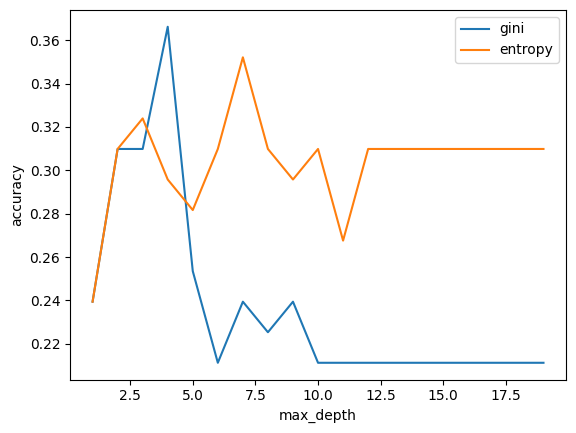

In [113]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

from sklearn.tree import DecisionTreeClassifier

dtreeGini = DecisionTreeClassifier(random_state=random_state, criterion='gini').fit(X_train_G12, y_train)

print (dtreeGini)
print(' ')
print('DTreeClasGini train', accuracy_score(y_train, dtreeGini.predict(X_train_G12)))
print('DTreeClasGini test',  accuracy_score(y_test,  dtreeGini.predict(X_test_G12)))

dtreeEntropy = DecisionTreeClassifier(random_state=random_state, criterion='entropy').fit(X_train_G12, y_train)
print('DTreeClasEntropy train', accuracy_score(y_train, dtreeEntropy.predict(X_train_G12)))
print('DTreeClasEntropy test',  accuracy_score(y_test,  dtreeEntropy.predict(X_test_G12)))

max_depth = []
acc_gini = []
acc_entropy = []

for i in range(1,20):

  dtree = DecisionTreeClassifier(random_state=random_state, criterion='gini', max_depth=i)
  dtree.fit(X_train_G12, y_train)
  pred = dtree.predict(X_test_G12)
  acc_gini.append(accuracy_score(y_test, pred))

  dtree = DecisionTreeClassifier(random_state=random_state, criterion='entropy', max_depth=i)
  dtree.fit(X_train_G12, y_train)
  pred = dtree.predict(X_test_G12)
  acc_entropy.append(accuracy_score(y_test, pred))

  max_depth.append(i)


d = pd.DataFrame({'acc_gini':pd.Series(acc_gini),
                  'acc_entropy':pd.Series(acc_entropy),
                  'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

In [114]:
print('min - max y', y_test.describe()[3],'-', y_test.describe()[7])
print('min - max y predict', pd.Series(dtreeEntropy.predict(X_train_G12)).describe()[3],'-', pd.Series(dtreeEntropy.predict(X_test_G12)).describe()[7])

min - max y 5.0 - 20.0
min - max y predict 4.0 - 18.0


Text(50.722222222222214, 0.5, 'Истинные')

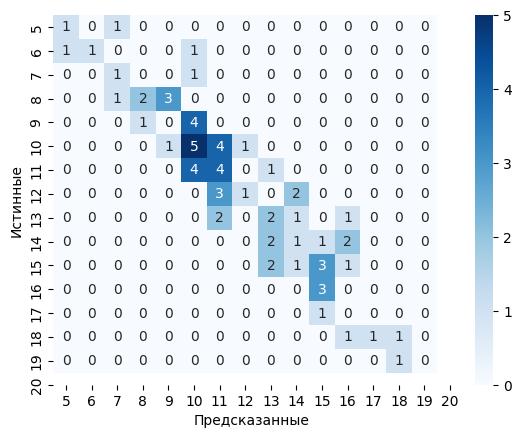

In [115]:
cm=metrics.confusion_matrix(y_test , dtreeEntropy.predict(X_test_G12))
sns.heatmap(cm, cmap="Blues", annot=True,
            #cbar_kws={'orientation':'vertical','label':'colorbar'},
            xticklabels=['5','6','7','8','9','10','11','12','13','14','15','16','17','18','19', '20'],
            yticklabels=['5','6','7','8','9','10','11','12','13','14','15','16','17','18','19', '20']
           )
plt.xlabel('Предсказанные')
plt.ylabel('Истинные')


Посмотрим на диапазон ошибок: классификатор в основном ошибается на 1-2 балла.

In [116]:
df=pd.DataFrame((y_test.ravel()-dtreeEntropy.predict(X_test_G12).ravel())).value_counts()
df

 0    22
 1    18
-1    14
-2     7
 2     7
-3     2
-4     1
dtype: int64

Построим модели деревьев с разными критериями (gini, entropy) с оптимальным параметром max_depth исходя из построенного графика.

Другой параметр min_samples_leaf=1 подобран ручным способом.

In [117]:
dtreeGiniParam = DecisionTreeClassifier(random_state=random_state,
                                        criterion='gini',
                                        max_depth=4,
                                        min_samples_leaf=1)#вручную подобранная модель
dtreeGiniParam.fit(X_train_G12, y_train)
print('gini train accuracy',accuracy_score(y_train, dtreeGiniParam.predict(X_train_G12)))
print('gini test accuracy', accuracy_score(y_test,  dtreeGiniParam.predict(X_test_G12)))
print('')

dtreeEntropParam = DecisionTreeClassifier(random_state=random_state,
                               criterion='entropy',
                               max_depth=8,
                               min_samples_leaf=1)#вручную подобранная модель
dtreeEntropParam.fit(X_train_G12, y_train)
print('entropy train accuracy',accuracy_score(y_train, dtreeEntropParam.predict(X_train_G12)))
print('entropy test accuracy', accuracy_score(y_test,  dtreeEntropParam.predict(X_test_G12)))


gini train accuracy 0.5428571428571428
gini test accuracy 0.36619718309859156

entropy train accuracy 0.9321428571428572
entropy test accuracy 0.30985915492957744


Попробуем подобрать параметры модели DecisionTreeClassifier автоматически через GridSearchCV.

In [118]:
criterion = ["gini", "entropy", "log_loss"]
splitter = ["best", "random"]
max_depth = [4, 5, 6, 7, 8]
min_samples_split = [4, 5, 6, 7, 8, 9, 10]
min_samples_leaf = [1, 2, 4, 6, 8, 10, 12]
max_features = [15, 20, 25, len(X_train_G12.columns)]

cv = StratifiedKFold(5)

grid_searcher_dtreeGiniParam = GridSearchCV(estimator=DecisionTreeClassifier(random_state=random_state),
                       cv=cv,
                       scoring='accuracy',
                       param_grid=dict(criterion=criterion,
                                       splitter=splitter,
                                       max_depth=max_depth,
                                       min_samples_split=min_samples_split,
                                       min_samples_leaf=min_samples_leaf,
                                       max_features= max_features),
                       #refit='Accuracy'
                       )
grid_searcher_dtreeGiniParam.fit(X_train_G12, y_train)
print("best param: ", grid_searcher_dtreeGiniParam.best_params_)
print("best score: ", grid_searcher_dtreeGiniParam.best_score_)

print('gini train accuracy',accuracy_score(y_train, grid_searcher_dtreeGiniParam.predict(X_train_G12)))
print('gini train accuracy',accuracy_score(y_test, grid_searcher_dtreeGiniParam.predict(X_test_G12)))

best param:  {'criterion': 'gini', 'max_depth': 6, 'max_features': 40, 'min_samples_leaf': 10, 'min_samples_split': 4, 'splitter': 'random'}
best score:  0.425
gini train accuracy 0.4928571428571429
gini train accuracy 0.30985915492957744


К сожалению, автоматически подобранные парамеры оказались хуже, чем параметры, подобранные вручную.

Вывод: несмотря на то, что все признаки в наборе данных категориальные, и отклик категориальный, ни одна модель классификации не смогла правильно  соотнести к одному из 20-ти классов (баллов) даже половину данных.


Наиболее подходящй моделью для наших данных оказалась модель регрессии GradientBoostingRegressor с параметрами по умолчанию. Ее результат оценки r2_score равен 0.897.